IMPORTING FILES

In [112]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df=pd.read_csv('/content/Train.csv')

EXPLORE DATA

In [114]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [115]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

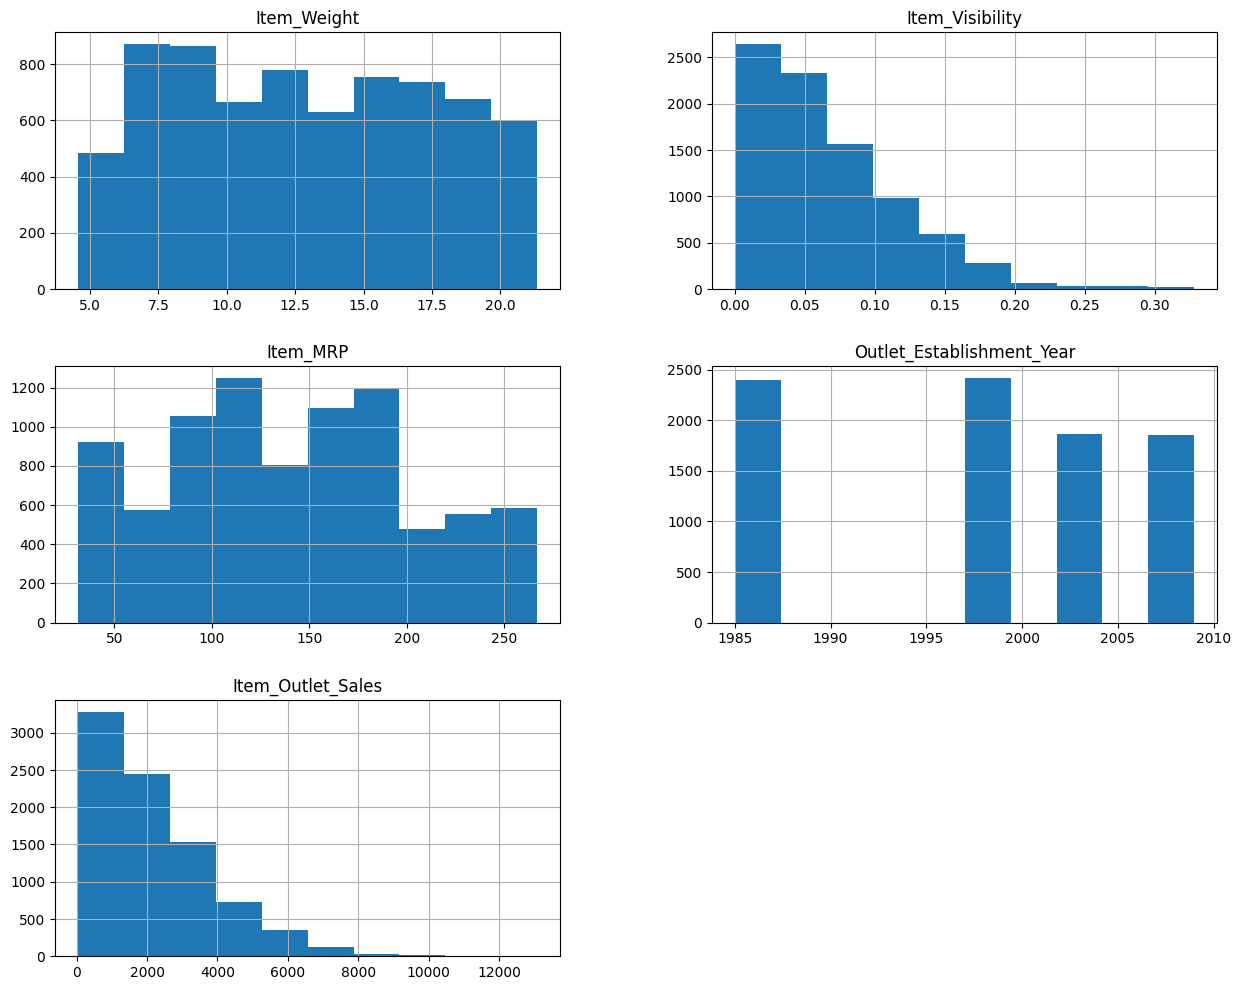

In [116]:
df.hist(figsize=(15,12))

CORRELATION BETWEEN TARGET AND FEATURES

In [117]:
corr_matrix=df.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [118]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [119]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')

In [120]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [121]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

DATA PROCESSING

In [122]:
df.Item_Identifier=df.Item_Identifier.astype('category')
df.Item_Fat_Content=df.Item_Fat_Content.astype('category')
df.Item_Type=df.Item_Type.astype('category')
df.Outlet_Identifier=df.Outlet_Identifier.astype('category')
df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.astype('int64')

df.Outlet_Type=df.Outlet_Type.astype('category')
df.Outlet_Location_Type=df.Outlet_Location_Type.astype('category')
df.Outlet_Size=df.Outlet_Size.astype('category')

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

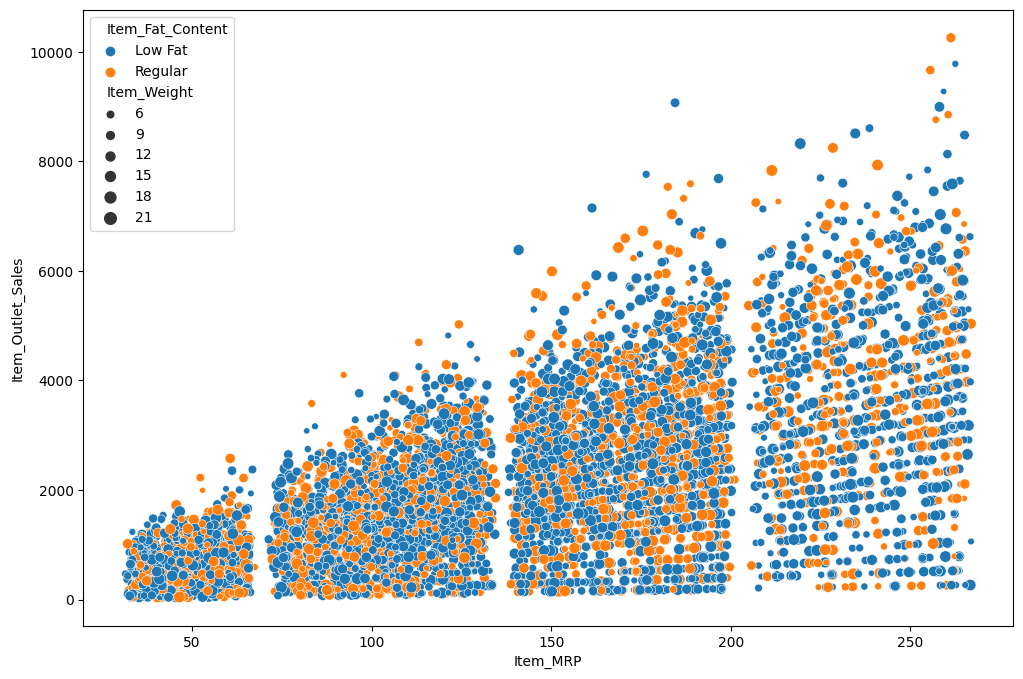

In [123]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)

COLUMN INTO BIN

In [124]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


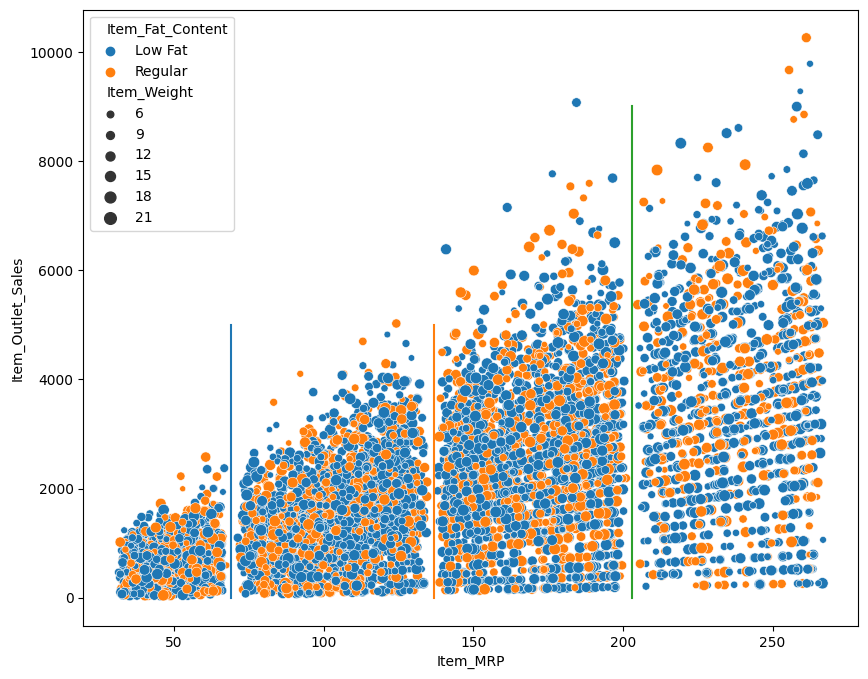

In [125]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

In [126]:
df.Item_MRP=pd.cut(df.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)

In [127]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

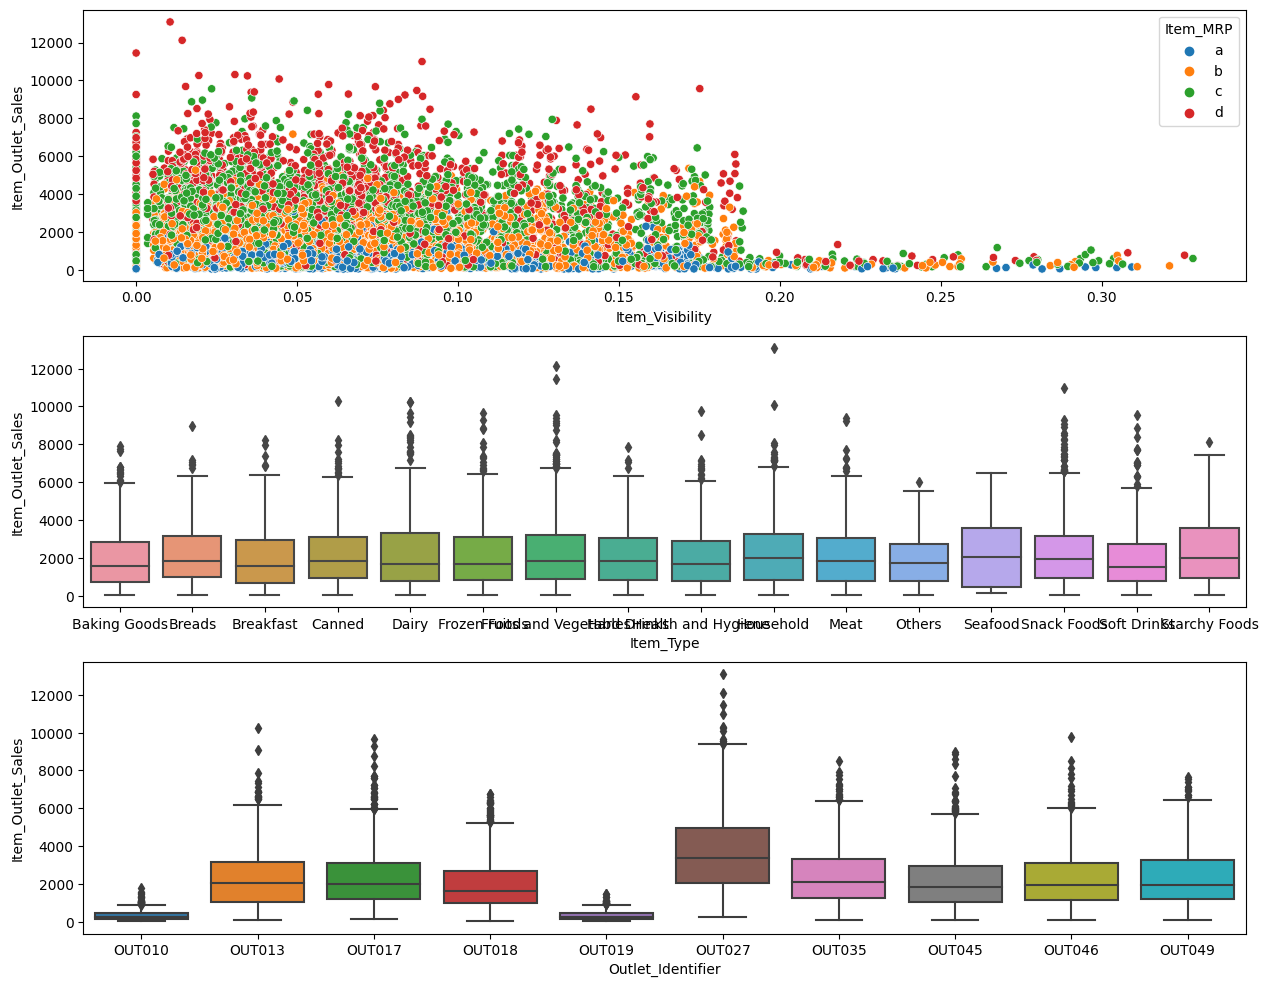

In [128]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=df)

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

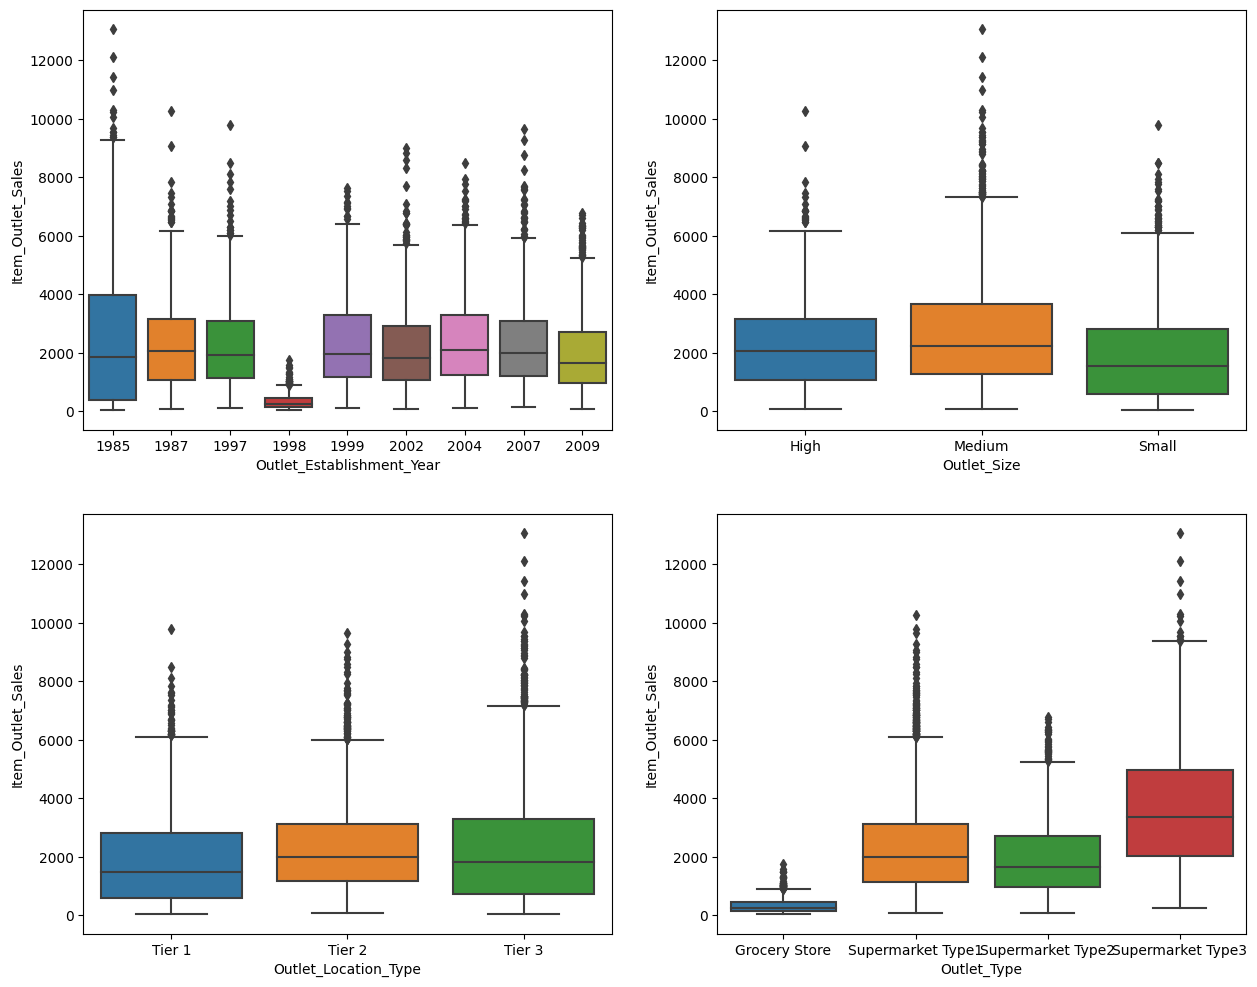

In [129]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

From above plots we can say that we can drop ITEM_VISIBILiTY along with ITEM_WEIGHT . Further more both of these column have very low correlation strength with target column.
Therefore Columns for model training will be

In [130]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

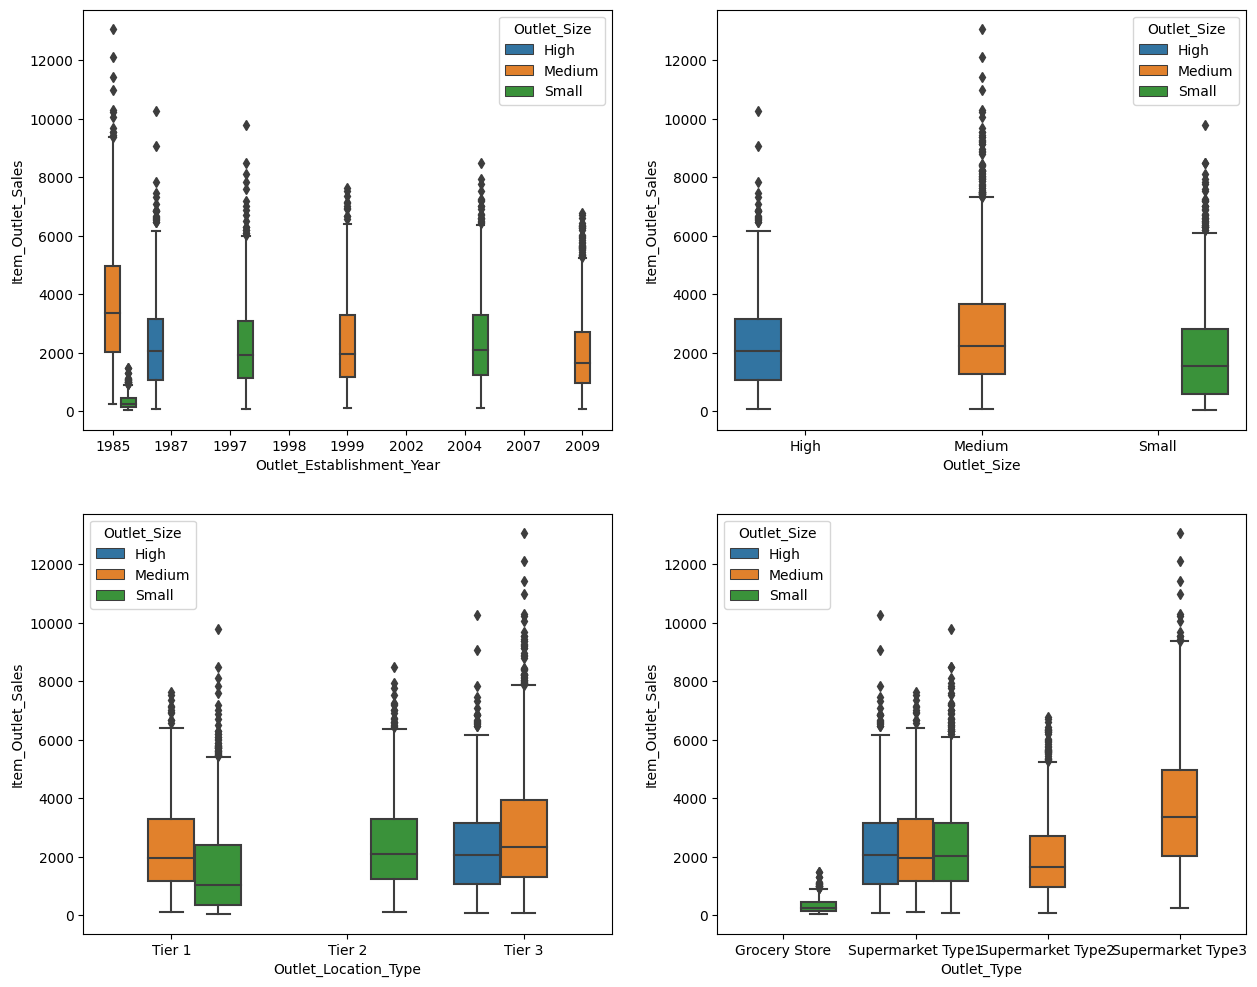

In [131]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)

In [132]:
data=df[attributes]

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   8523 non-null   category
 1   Outlet_Type                8523 non-null   category
 2   Outlet_Location_Type       8523 non-null   category
 3   Outlet_Size                6113 non-null   category
 4   Outlet_Establishment_Year  8523 non-null   int64   
 5   Outlet_Identifier          8523 non-null   category
 6   Item_Type                  8523 non-null   category
 7   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(1), int64(1)
memory usage: 184.9 KB


<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

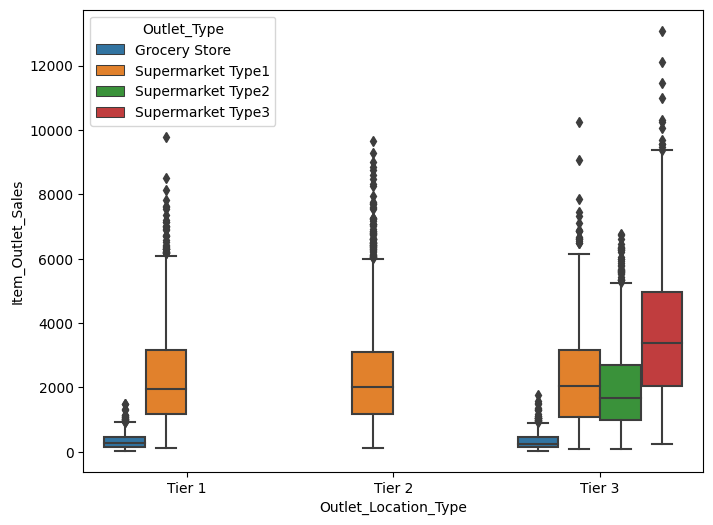

In [134]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=data)

In [135]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
...,...,...,...,...,...,...,...,...
8502,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Household,3020.0688
8508,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Fruits and Vegetables,2587.9646
8509,d,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,424.7804
8514,a,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,468.7232


One thing to observe is when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null furthermore when OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null

In [136]:
data.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Tier 2      0
Name: Outlet_Location_Type, dtype: int64

In [137]:
data.groupby('Outlet_Type').get_group('Grocery Store')

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
23,b,Grocery Store,Tier 1,Small,1985,OUT019,Baking Goods,214.3876
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
29,a,Grocery Store,Tier 1,Small,1985,OUT019,Canned,125.8362
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
...,...,...,...,...,...,...,...,...
8473,c,Grocery Store,Tier 3,NaN,1998,OUT010,Hard Drinks,431.4384
8480,c,Grocery Store,Tier 1,Small,1985,OUT019,Snack Foods,459.4020
8486,a,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,45.2744
8490,c,Grocery Store,Tier 1,Small,1985,OUT019,Fruits and Vegetables,487.3656


In [138]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                                         High             0
                                         Medium           0
                      Supermarket Type1  Medium         930
                                         Small          930
                                         High             0
Tier 2                Supermarket Type1  Small          930
                                         High             0
                                         Medium           0
Tier 3                Grocery Store      High             0
                                         Medium           0
                                         Small            0
                      Supermarket Type1  High           932
                                         Medium           0
                                         Small            0
                      Supermarket Type2  Medium

In [139]:
(data.Outlet_Identifier=='OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [140]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
             OUT010                 0
             OUT017                 0
             OUT018                 0
             OUT019                 0
             OUT027                 0
             OUT035                 0
             OUT045                 0
             OUT046                 0
             OUT049                 0
Medium       OUT027               935
             OUT049               930
             OUT018               928
             OUT010                 0
             OUT013                 0
             OUT017                 0
             OUT019                 0
             OUT035                 0
             OUT045                 0
             OUT046                 0
Small        OUT035               930
             OUT046               930
             OUT019               528
             OUT010                 0
             OUT013                 0
             OUT017

Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) shop
Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop

In [141]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [142]:
data.head()


,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

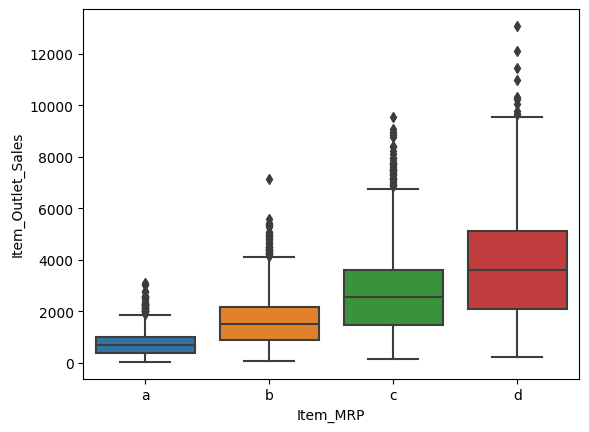

In [143]:
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

In [144]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.max()

7158.6816

In [145]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,Medium,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,Medium,1985,OUT027,Household,7158.6816


In [146]:
data=data.drop(index=7796)
data.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].max()

5582.733

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

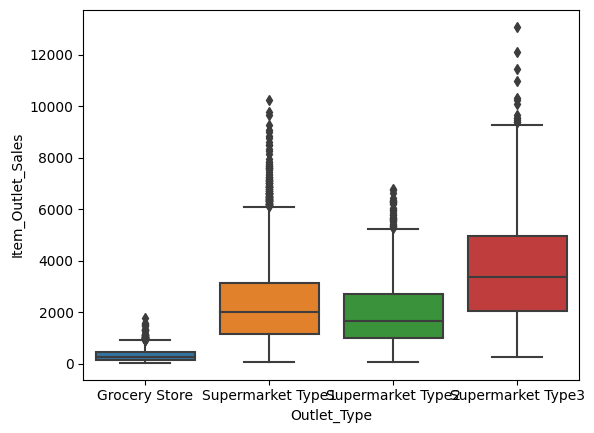

In [147]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

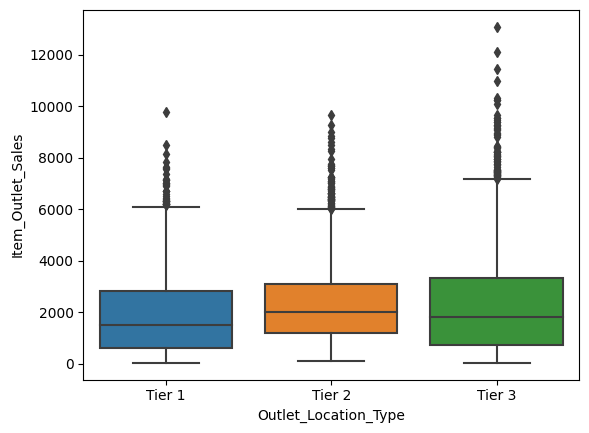

In [148]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)

In [149]:
data[data.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [150]:
data[data['Item_Outlet_Sales']==9779.9362]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,Small,1997,OUT046,Health and Hygiene,9779.9362


In [151]:
data=data.drop(index=4289)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

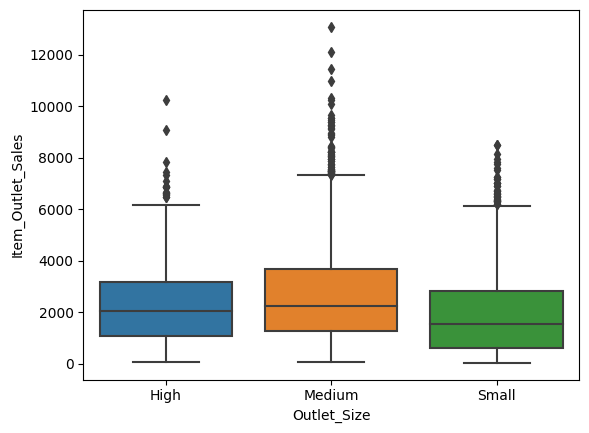

In [152]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

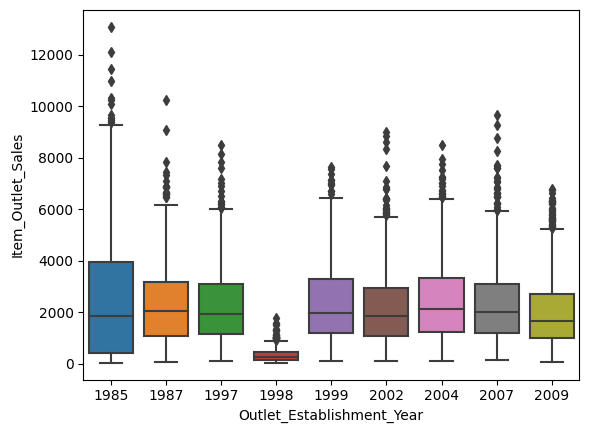

In [153]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

In [154]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('category')
data_label=data.Item_Outlet_Sales
data_dummy=pd.get_dummies(data.iloc[:,0:6])

In [155]:
data_dummy['Item_Outlet_Sales']=data_label

In [156]:
data_dummy.shape

(8521, 34)

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
train,test = train_test_split(data_dummy,test_size=0.20,random_state=2019)

In [159]:
train.shape , test.shape

((6816, 34), (1705, 34))

In [160]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
lr=LinearRegression()

In [163]:
lr.fit(train,train_label)

LinearRegression()

In [164]:
from sklearn.metrics import mean_squared_error

In [165]:
predict_lr=lr.predict(test)

In [166]:
mse=mean_squared_error(test_label,predict_lr)

In [167]:
lr_score=np.sqrt(mse)

In [168]:
lr_score

1171.572895254281

linear regression

In [169]:
from sklearn.model_selection import cross_val_score

In [170]:
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [171]:
lr_score_cross=np.sqrt(-score)

In [172]:
np.mean(lr_score_cross),np.std(lr_score_cross)

(1149.7568272819476, 31.897470283973064)

Ridge regression

In [173]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(train,train_label)
predict_r=r.predict(test)
mse=mean_squared_error(test_label,predict_r)
r_score=np.sqrt(mse)
r_score

1170.8360292639388

cross val ridge

In [174]:
r=Ridge(alpha=0.05,solver='cholesky')
score=cross_val_score(r,train,train_label,cv=10,scoring='neg_mean_squared_error')
r_score_cross=np.sqrt(-score)
np.mean(r_score_cross),np.std(r_score_cross)

(1148.000500496359, 33.2135243935096)

LASSO


In [175]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.01)
l.fit(train,train_label)
predict_l=l.predict(test)
mse=mean_squared_error(test_label,predict_l)
l_score=np.sqrt(mse)
l_score

1170.8353348573844

In [176]:
l=Lasso(alpha=0.01)
score=cross_val_score(l,train,train_label,cv=10,scoring='neg_mean_squared_error')
l_score_cross=np.sqrt(-score)
np.mean(l_score_cross),np.std(l_score_cross)

(1148.00025406716, 33.216384560709706)

elastic net

In [177]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
en.fit(train,train_label)
predict_r=en.predict(test)
mse=mean_squared_error(test_label,predict_r)
en_score=np.sqrt(mse)
en_score

1172.0442504389457

cross val elastic

In [178]:
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
score=cross_val_score(en,train,train_label,cv=10,scoring='neg_mean_squared_error')
en_score_cross=np.sqrt(-score)
np.mean(en_score_cross),np.std(en_score_cross)

(1148.310146391918, 33.599738570511185)

Stochastic gradient

In [179]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty='l2',max_iter=100,tol=0.05)
sgd.fit(train,train_label)
predict_r=sgd.predict(test)
mse=mean_squared_error(test_label,predict_r)
sgd_score=np.sqrt(mse)
sgd_score

1170.7745783207915

cross val stochastic gradient

In [180]:
sgd=SGDRegressor(penalty='l2',max_iter=100,tol=0.05)
score=cross_val_score(sgd,train,train_label,cv=10,scoring='neg_mean_squared_error')
sgd_score_cross=np.sqrt(-score)
np.mean(sgd_score_cross),np.std(sgd_score_cross)

(1148.2032883747593, 33.21297790489399)

SVR

In [181]:
from sklearn.svm import SVR
svm=SVR(epsilon=15,kernel='linear')
svm.fit(train,train_label)
predict_r=svm.predict(test)
mse=mean_squared_error(test_label,predict_r)
svm_score=np.sqrt(mse)
svm_score

1436.6823019796545

cross vai SVR

In [182]:
svm=SVR(epsilon=15,kernel='linear')
score=cross_val_score(svm,train,train_label,cv=10,scoring='neg_mean_squared_error')
svm_score_cross=np.sqrt(-score)
np.mean(svm_score_cross),np.std(svm_score_cross)


(1392.7292110409637, 45.76367114108413)

Decision Tree

In [183]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(train,train_label)
predict_r=dtr.predict(test)
mse=mean_squared_error(test_label,predict_r)
dtr_score=np.sqrt(mse)
dtr_score

1123.1955839571694

cross VAI decision tree

In [184]:
dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,train,train_label,cv=10,scoring='neg_mean_squared_error')
dtr_score_cross=np.sqrt(-score)
np.mean(dtr_score_cross),np.std(dtr_score_cross)

(1097.216824037842, 32.98894477916788)

Random Forest

In [185]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train,train_label)
predict_r=rf.predict(test)
mse=mean_squared_error(test_label,predict_r)
rf_score=np.sqrt(mse)
rf_score

1123.2646272266313

Cross Val RandomFores

In [186]:
rf=RandomForestRegressor()
score=cross_val_score(rf,train,train_label,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

(1097.6679620664127, 32.98020780165389)

Bagging Regressoion

In [187]:
from sklearn.ensemble import BaggingRegressor

In [188]:
br=BaggingRegressor(max_samples=70)

In [189]:
br.fit(train,train_label)

BaggingRegressor(max_samples=70)

In [190]:
score=br.predict(test)

In [191]:
br_score=mean_squared_error(test_label,score)

In [192]:
br_score=np.sqrt(br_score)
br_score

1181.5269324051364

Cross Val Bagging

In [193]:
br=BaggingRegressor()
score=cross_val_score(br,train,train_label,cv=10,scoring='neg_mean_squared_error')
br_score_cross=np.sqrt(-score)
np.mean(br_score_cross),np.std(br_score_cross)

(1096.7429281698962, 33.29410424423362)

ADAPTIVE BOOSTING

In [194]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(train,train_label)
g=ada.predict(test)
ada_score=mean_squared_error(test_label,g)
ada_score=np.sqrt(ada_score)
ada_score


1197.8472135229795

Cross val for ADA BOOST

In [195]:
ada=AdaBoostRegressor()
score=cross_val_score(ada,train,train_label,cv=10,scoring='neg_mean_squared_error')
ada_score_cross=np.sqrt(-score)
np.mean(ada_score_cross),np.std(ada_score_cross)

(1179.883869433768, 23.71946369193412)

Gradient BOOSTING

In [196]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train,train_label)
p=gbr.predict(test)
gb_score=mean_squared_error(test_label,p)
gb_score=np.sqrt(gb_score)
gb_score

1122.7570568214066

Cross Val for Gb

In [197]:
gb=GradientBoostingRegressor()
score=cross_val_score(gb,train,train_label,cv=10,scoring='neg_mean_squared_error')
gb_score_cross=np.sqrt(-score)
np.mean(gb_score_cross),np.std(gb_score_cross)

(1096.7744507586508, 33.27502298333169)

Dataframe

In [198]:
name=['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Elastic Net Regression','Elastic Net Regression CV','SGD Regression','SGD Regression CV',
     'SVM','SVM CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV','Ada Boost','Ada Boost CV',
     'Bagging','Bagging CV','Gradient Boost','Gradient Boost CV']

In [199]:
go=pd.DataFrame({'RMSE':[lr_score,lr_score_cross,r_score,r_score_cross,l_score,l_score_cross,en_score,en_score_cross,
                     sgd_score,sgd_score_cross,svm_score,svm_score_cross,dtr_score,dtr_score_cross,rf_score,rf_score_cross,
                     ada_score,ada_score_cross,br_score,br_score_cross,gb_score,gb_score_cross]},index=name)

In [200]:
go['RMSE']=go.applymap(lambda x: x.mean())

In [201]:
go.RMSE.sort_values()

Bagging CV                   1096.742928
Gradient Boost CV            1096.774451
Decision Tree Regression     1097.216824
Random Forest CV             1097.667962
Gradient Boost               1122.757057
Decision Tree                1123.195584
Random Forest                1123.264627
Lasso Regression CV          1148.000254
Ridge Regression CV          1148.000500
SGD Regression CV            1148.203288
Elastic Net Regression CV    1148.310146
Linear Regression CV         1149.756827
SGD Regression               1170.774578
Lasso Regression             1170.835335
Ridge Regression             1170.836029
Linear Regression            1171.572895
Elastic Net Regression       1172.044250
Ada Boost CV                 1179.883869
Bagging                      1181.526932
Ada Boost                    1197.847214
SVM CV                       1392.729211
SVM                          1436.682302
Name: RMSE, dtype: float64

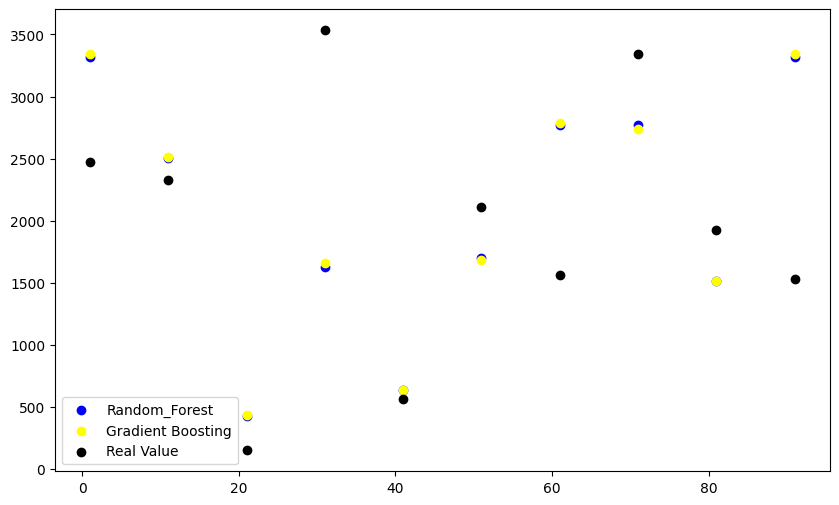

In [202]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),predict_r[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),p[0:100:10],color='yellow')
plt.scatter(np.arange(1,100,10),test_label[0:100:10],color='black')
plt.legend(['Random_Forest','Gradient Boosting','Real Value'])

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
gb=GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.01)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]
gs=GridSearchCV(gb,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(train,train_label)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=7,
                                                 n_estimators=200),
             param_grid=[{'max_features': [8, 10, 15, 18],
                          'max_leaf_nodes': [3, 5, 7, 9],
                          'min_samples_split': [5, 9, 13]}],
             scoring='neg_mean_squared_error')

In [205]:
gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=18,
                          max_leaf_nodes=9, min_samples_split=9,
                          n_estimators=200)

In [206]:
gb=gs.best_estimator_

In [207]:
total=pd.concat([train,test],axis=0,ignore_index=True)

In [208]:
total_label=pd.concat([train_label,test_label],axis=0,ignore_index=True)

In [209]:
total_label.shape,total.shape

((8521,), (8521, 33))

In [210]:
gb.fit(total,total_label)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=18,
                          max_leaf_nodes=9, min_samples_split=9,
                          n_estimators=200)

TEST IMPORTING

In [211]:
test=pd.read_csv('/content/Test.csv')

In [212]:
test.shape

(5681, 11)

Test Data Preprocessing

In [213]:
attributes=['Item_MRP',
 'Outlet_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Item_Type']

In [214]:
test=test[attributes]

In [215]:
test.shape

(5681, 7)

In [216]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_MRP                   5681 non-null   float64
 1   Outlet_Type                5681 non-null   object 
 2   Outlet_Size                4075 non-null   object 
 3   Outlet_Location_Type       5681 non-null   object 
 4   Outlet_Establishment_Year  5681 non-null   int64  
 5   Outlet_Identifier          5681 non-null   object 
 6   Item_Type                  5681 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 310.8+ KB


In [217]:
test.Item_MRP=pd.cut(test.Item_MRP,bins=[25,75,140,205,270],labels=['a','b','c','d'],right=True)
test.Item_Type=test.Item_Type.astype('category')
test.Outlet_Size=test.Outlet_Size.astype('category')
test.Outlet_Identifier=test.Outlet_Identifier.astype('category')
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('int64')
test.Outlet_Type=test.Outlet_Type.astype('category')
test.Outlet_Location_Type=test.Outlet_Location_Type.astype('category')

In [218]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   5681 non-null   category
 1   Outlet_Type                5681 non-null   category
 2   Outlet_Size                4075 non-null   category
 3   Outlet_Location_Type       5681 non-null   category
 4   Outlet_Establishment_Year  5681 non-null   int64   
 5   Outlet_Identifier          5681 non-null   category
 6   Item_Type                  5681 non-null   category
dtypes: category(6), int64(1)
memory usage: 79.5 KB


In [219]:
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('category')

In [220]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   5681 non-null   category
 1   Outlet_Type                5681 non-null   category
 2   Outlet_Size                4075 non-null   category
 3   Outlet_Location_Type       5681 non-null   category
 4   Outlet_Establishment_Year  5681 non-null   category
 5   Outlet_Identifier          5681 non-null   category
 6   Item_Type                  5681 non-null   category
dtypes: category(7)
memory usage: 41.0 KB


In [221]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [223]:
test_dummy=pd.get_dummies(test.iloc[:,0:6])

In [224]:
test_dummy.head()

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


Now predict price of test data with our ML Model

In [238]:
train_dummy = pd.DataFrame({'Item_MRP_a': [10, 20, 30], 'Item_MRP_b': [40, 50, 60]})

In [239]:
global train_dummy
train_dummy = pd.DataFrame({'Item_MRP_a': [10, 20, 30], 'Item_MRP_b': [40, 50, 60]})

In [240]:
train_dummy.shape

(3, 2)

In [241]:
sample=pd.read_csv('/content/Submission.csv')

In [242]:
sample.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [243]:
del sample['Item_Outlet_Sales']

In [264]:
df = pd.DataFrame.from_records(train_dummy)
sample.rename(columns={'Item_Outlet_Sales': 'Item_Outlet_Sales_dummy'}, inplace=True)
sample = pd.DataFrame.from_records(train_dummy.to_dict('records'))
corr_ans = pd.concat([sample, df], axis=1)
corr_ans.drop('Unnamed: 0', axis=1, errors='ignore')
corr_ans

,Item_MRP_a,Item_MRP_b,Item_MRP_a,Item_MRP_b
0,10,40,10,40
1,20,50,20,50
2,30,60,30,60


In [265]:
corr_ans.to_csv('correct.csv',index=None)